<p align="center">
<img align="center" width="600" src="../imgs/logo.png">
<h3 align="center">Introduction to Data Science</h3>
<h4 align="center">Chapter 3: Visualizations</h4>
<h5 align="center">Yam Peleg</h5>
</p>
<hr>

Many of the slides and notebooks in this repository are based on other repositories and tutorials. 

**References for this notebook:**  

* **[Bruno Gonçalves, Data For Science - DataViz](https://github.com/DataForScience/DataViz)**

<hr>

### The Data

![](https://www.reno.gov/Home/ShowImage?id=7739&t=635620964226970000)

**Competition Description from Kaggle**  
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Data description**  
This is a detailed description of the 79 features and their entries, quite important for this competition.  
You can download the txt file here: [**download**](https://www.kaggle.com/c/5407/download/data_description.txt)

**References**  

* **[Kaggle: Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)**
* **[Udemy: Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/)**
* **[Data School: Machine learning in Python with scikit-learn](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A)**



In [7]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Seaborn datasets

Seaborn makes a small list of datasets easily available:

In [8]:
sns.get_dataset_names()

[u'anscombe',
 u'attention',
 u'brain_networks',
 u'car_crashes',
 u'diamonds',
 u'dots',
 u'exercise',
 u'flights',
 u'fmri',
 u'gammas',
 u'iris',
 u'mpg',
 u'planets',
 u'tips',
 u'titanic']

This makes it easier to learn how to use the library using standard data

In [9]:
tips = sns.load_dataset("tips")

The first time you load a dataset you'll need an internet connection so that the data can be downloaded from github. The **load_dataset** function returns a pandas data frame

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Scatter plot

Seaborn is designed to facilitate the use of data frames. Making an attractive scatter plot is as simple as:

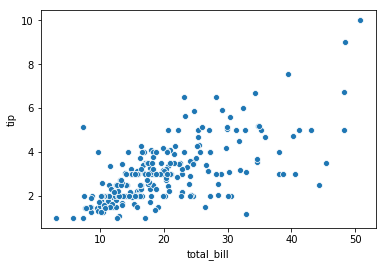

In [11]:
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)

In [12]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

As you can see the axis level functions return an Axis object

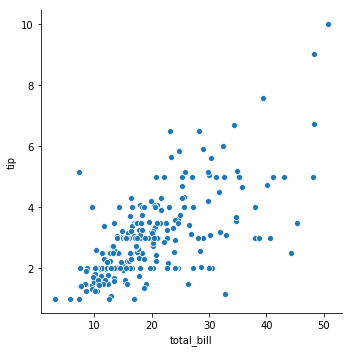

In [13]:
fg = sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter")

In [14]:
type(fg)

seaborn.axisgrid.FacetGrid

The generic figure functions return a FacetGrid object. Making more complex figures is also very simple

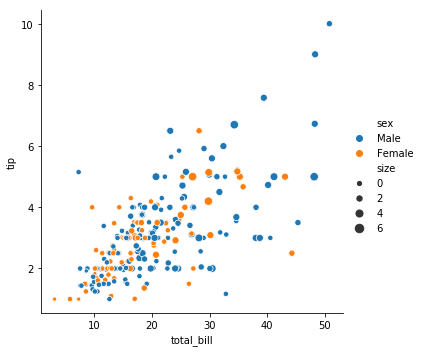

In [15]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", size="size",
            )

And we cna specify the order in which the colors are used

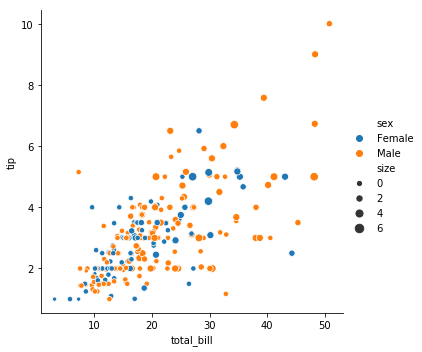

In [16]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", size="size",
            hue_order=["Female", "Male"],  
            )

And differnet marker types, etc

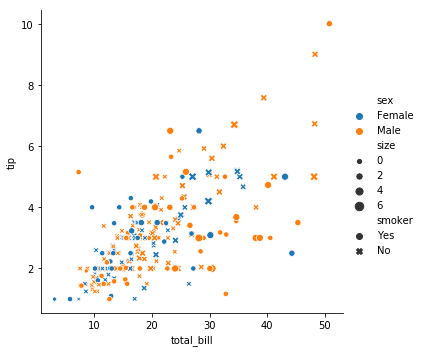

In [17]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", size="size", style='smoker',
            hue_order=["Female", "Male"],  
            )

The main advantage of the figure level functions is that they can easily generate subplots covering other dimensions of the dataset

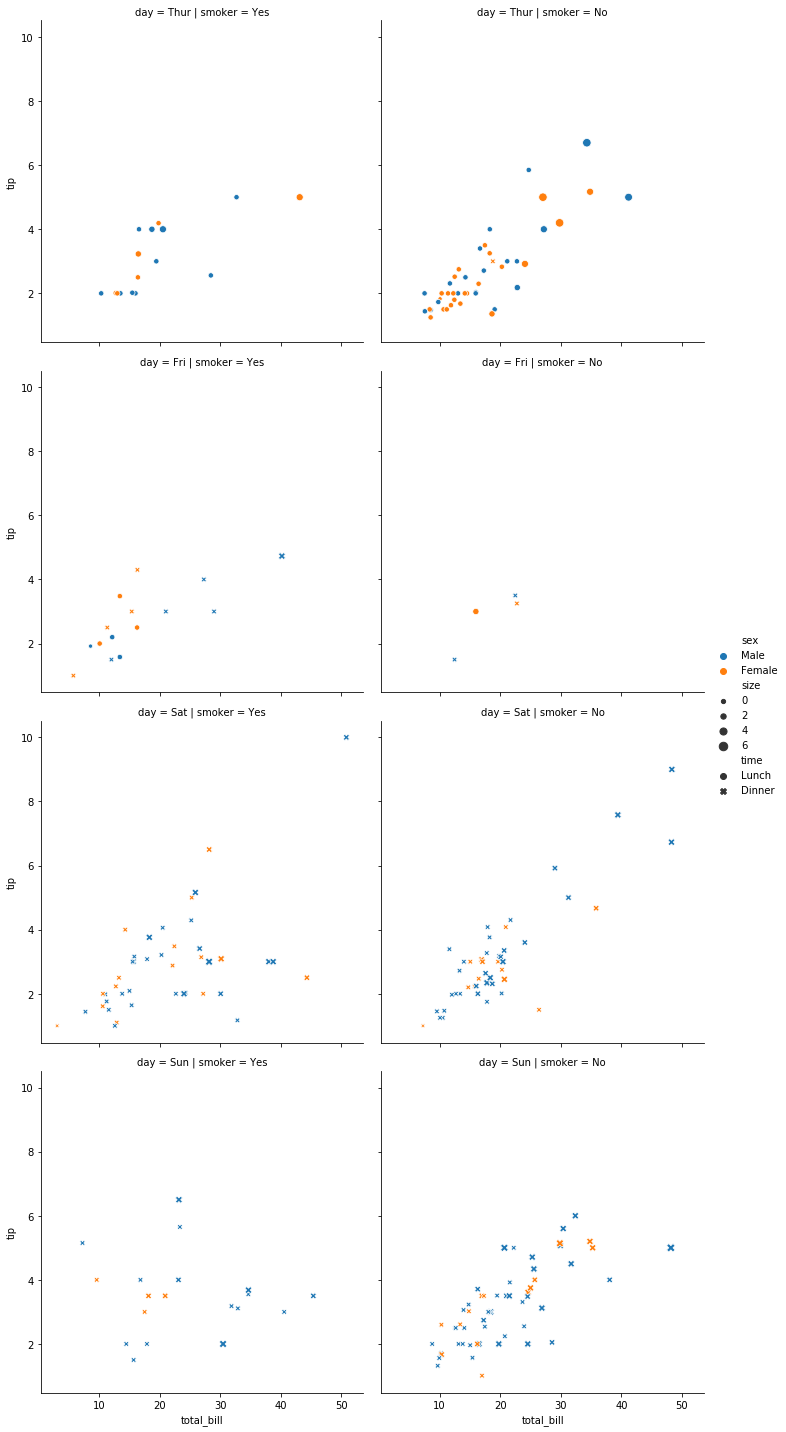

In [18]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", size="size", 
            col='smoker', row='day', style='time',
            row_order=["Thur", "Fri", "Sat", 'Sun']
            )

# Categorical functions

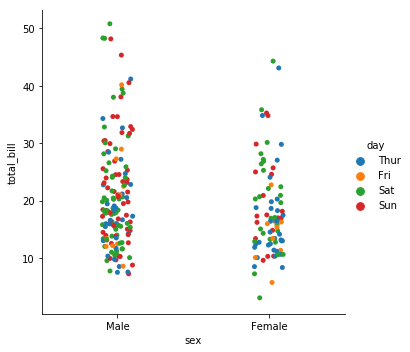

In [19]:
sns.catplot(x="sex", y="total_bill", hue="day", data=tips, kind="strip")

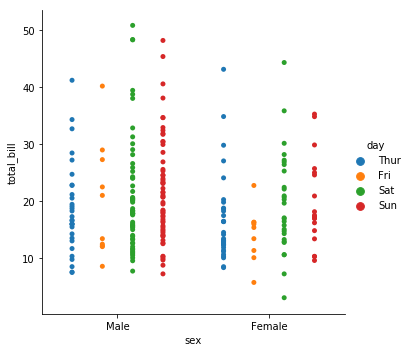

In [20]:
sns.catplot(x="sex", y="total_bill", hue="day", data=tips, kind="strip", jitter=False, dodge=True)

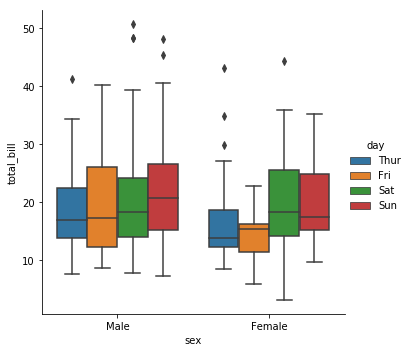

In [21]:
sns.catplot(x="sex", y="total_bill", hue="day", data=tips, kind="box")

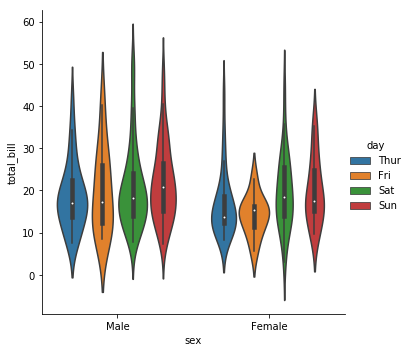

In [22]:
sns.catplot(x="sex", y="total_bill", hue="day", data=tips, kind="violin")

# Axis level functions

While Figure level plots are extremely convenient for data exploration they have one fundamental limitation. Figure level functions build their own figure from scratch. This means that they are not easily stackable so you can't easily combine multiple plots on top of one another. 

This is perhaps the main reason you migth find yourself using axis level functions directly. Let's look at a quick example

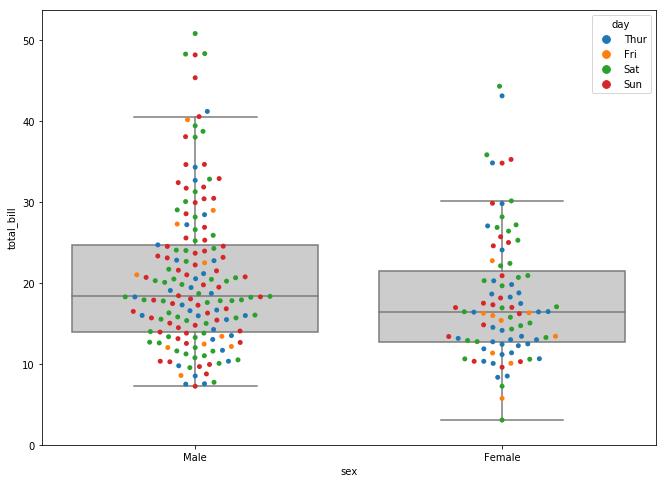

In [23]:
sns.boxplot(x="sex", y="total_bill", data=tips, color=".8", showfliers=False)
sns.swarmplot(x="sex", y="total_bill", hue="day", data=tips)
plt.gcf().set_size_inches(11, 8)

# FacetGrid

We already saw how we can easily use figure level functions to generate faceted plots

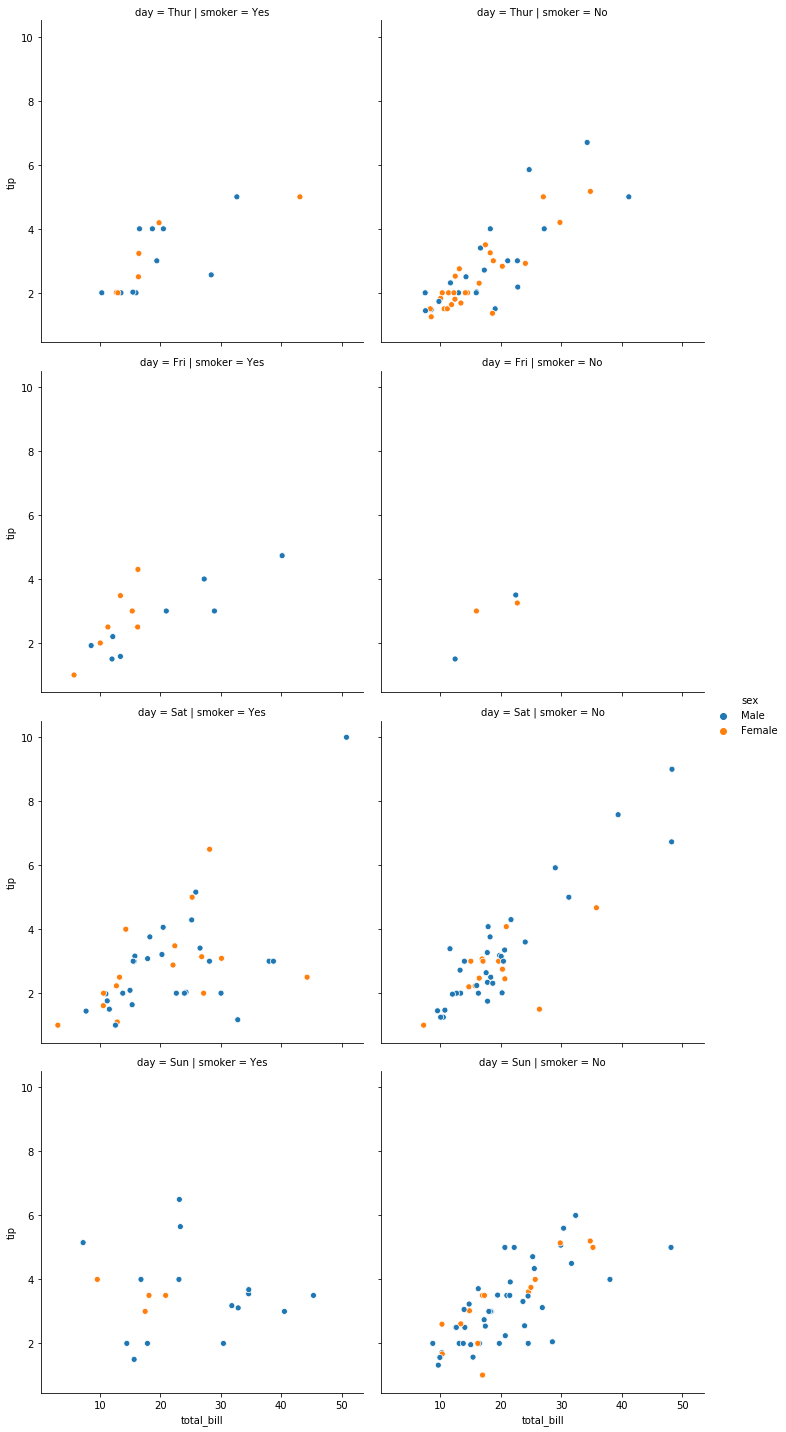

In [24]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", 
            col='smoker', row='day',
            row_order=["Thur", "Fri", "Sat", 'Sun']
            )

This can also be done manually using **FacetGrid**. First we instantiate a facet 

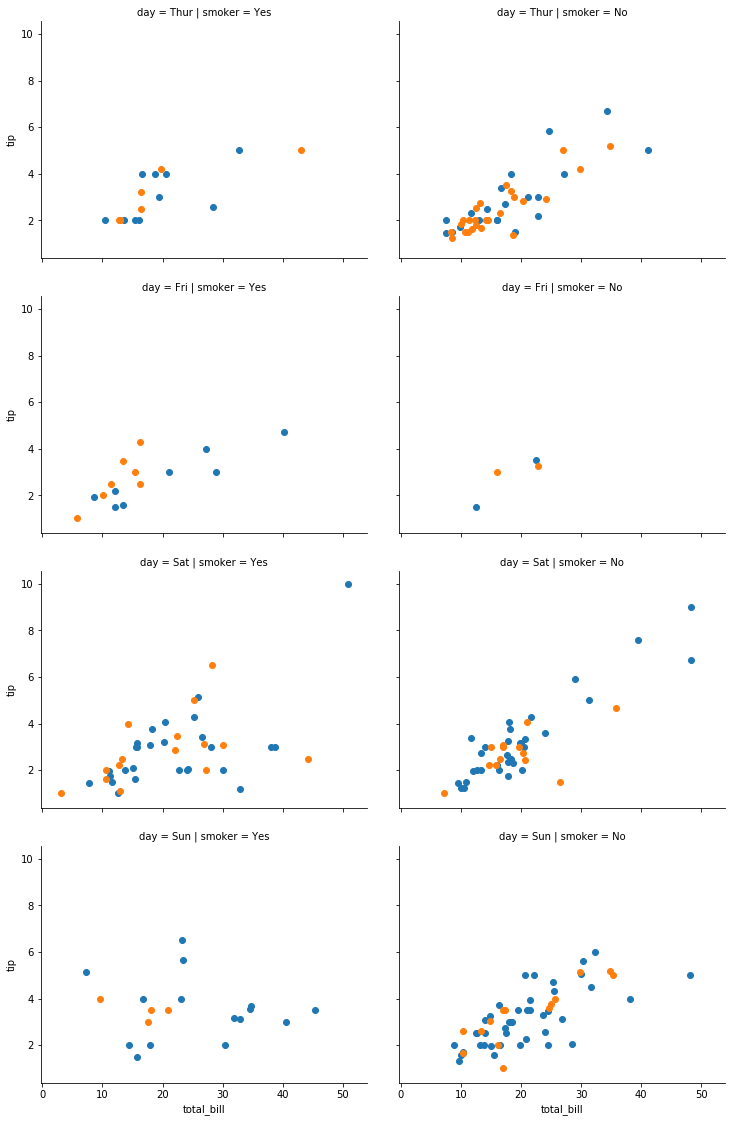

In [25]:
fg = sns.FacetGrid(tips,
            col="smoker", row="day", hue="sex", 
            row_order=["Thur", "Fri", "Sat", 'Sun']
            )
fg.map(plt.scatter, "total_bill", "tip")
plt.gcf().set_size_inches(11, 16)

The **FacetGrid** object contains pointers to all the axes so that we can manipulate them directly, if we wish

In [26]:
fg.axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0290c1d510>,
      dtype=object)

So if we want to add an extra line to one of the subplots we can easily do:

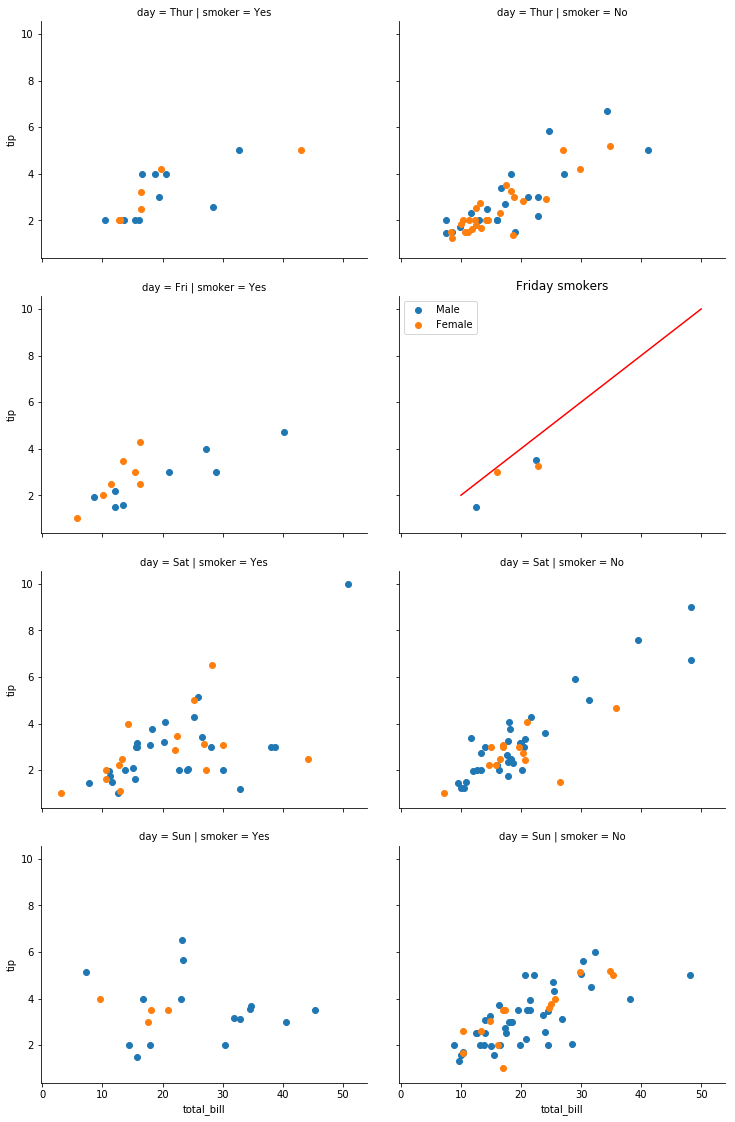

In [27]:
fg = sns.FacetGrid(tips,
            col="smoker", row="day", hue="sex", 
            row_order=["Thur", "Fri", "Sat", 'Sun']
            )
fg.map(plt.scatter, "total_bill", "tip")

# call methods directly on the axis object
fg.axes[1][1].plot([10, 50], [2, 10], 'r-') 
fg.axes[1][1].set_title('Friday smokers')
fg.axes[1][1].legend()
plt.gcf().set_size_inches(11, 16)

# Advanced plots

## Pair plot

This generates a matrix of plots looking at all combinations of 

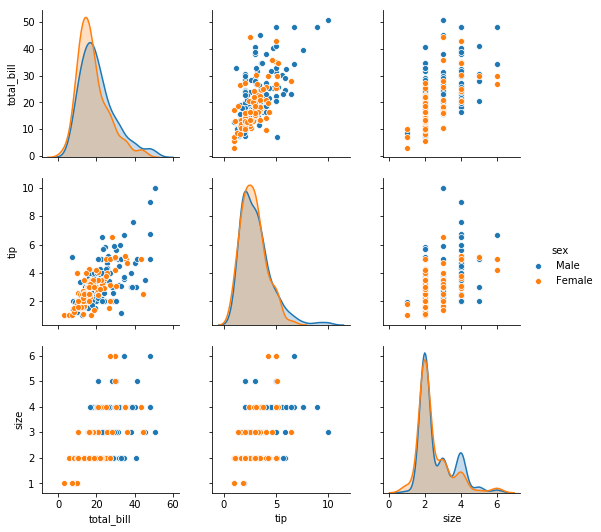

In [28]:
pp = sns.pairplot(tips, hue="sex")

Pairplots return a **PairGrid** object, a specialized version of **FacetGrid**. We can still access the individual axis objects in the same way as before

In [29]:
pp.axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02909bc490>,
      dtype=object)

## Joint plot

**jointplot** is also a useful way of exploring datasets. It makes a scatter plot in the center and histograms on the margins

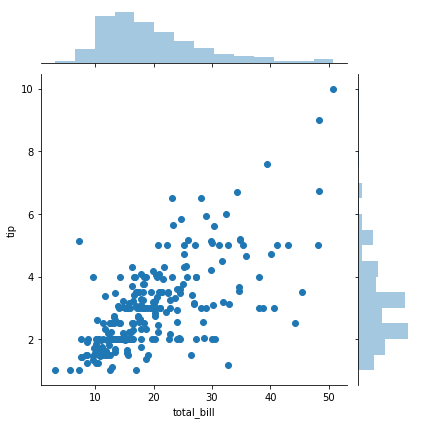

In [30]:
jp = sns.jointplot("total_bill", "tip", data=tips)

**Joint plots** return a **JointGrid** object that is slightly different in structure than a **FacetGrid**. To access the center plot you use **jp.ax_joint** and **jp.ax_marg_x**, **jp.ax_marg_y** for the x and y margin plots

In [31]:
print(type(jp.ax_joint))
print(type(jp.ax_marg_x))
print(type(jp.ax_marg_y))

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


You can also use the jointplot to visualize the point density

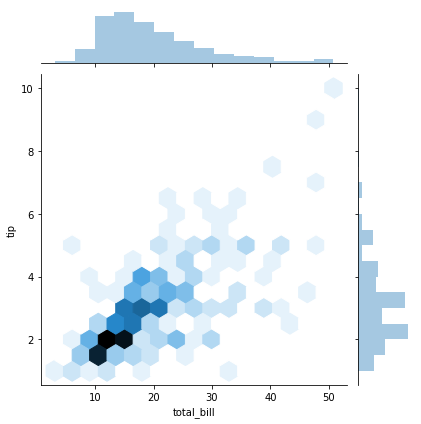

In [32]:
jp = sns.jointplot("total_bill", "tip", data=tips, kind="hex")

We've only just tapped into the seaborn capabilities. It is able to do much more and you should explore the excellent online documentation